In [74]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import time



In [131]:
df = pd.read_csv('Index Rent Smart.csv',parse_dates=['date'],index_col=0)

/Users/bhavanian/myenvs/housing/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (57,68,70) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [132]:
list(df)

['date',
 'violation_type',
 'description',
 'Description Category',
 'Index',
 'address',
 'neighborhood',
 'zip_code',
 'parcel',
 'owner',
 'year built',
 'year remodeled',
 'property_type',
 'latitude',
 'longitude',
 'st_num',
 'st_name',
 'st_name_suf',
 'zipcode_str',
 'id',
 'pid_long',
 'cm_id',
 'building_typology',
 'building_subtypology',
 'use_class',
 'sqft_class',
 'year_built_class',
 'unit_num',
 'zipcode',
 'yr_built',
 'land_sf',
 'gross_area',
 'living_area',
 'sqft',
 'num_floors',
 'num_bldgs',
 'units_res',
 'units_com',
 'units_mixed',
 'ptype',
 'ptype_list',
 'lu',
 'lu_list',
 'assessor_category',
 'assessor_description',
 'own_occ',
 'own_occ_list',
 'owner_list',
 'structure_class',
 'structure_class_list',
 'bldg_styl',
 'bldg_styl_list',
 'r_roof_typ',
 'ext_fin',
 'ext_fin_list',
 'ext_cond_list',
 'insulation_type',
 'foundation_type',
 'heat_typ',
 'heat_typ_list',
 'heating_system_fuel',
 'ac',
 'ac_list',
 'ac_system_type',
 'hot_water_system_fuel',


In [133]:
df_byaddress = df.drop(columns=['date','violation_type','description'])

In [134]:
df_byaddress = df_byaddress.groupby('address').mean()

In [135]:
df_byaddress = df_byaddress.rename(columns={'Index':'Severity'})

In [136]:
index_sum = df.groupby('address')['Index'].sum()

In [137]:
df_byaddress['Index_Sum'] = index_sum 

In [138]:
oldest_complaint = df.groupby('address')['date'].min()

In [139]:
newest_complaint = df.groupby('address')['date'].max()

In [140]:
df_byaddress['Timeframe'] = (newest_complaint - oldest_complaint)

In [141]:
df_byaddress['Frequency_of_Complaints'] = df_byaddress['Index_Sum'] / df_byaddress['Timeframe'].dt.days

In [142]:
df_byaddress

,Severity,zip_code,parcel,year built,year remodeled,latitude,longitude,st_num,zipcode_str,id,...,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_hh_income_200000_or_more,ct_perc_income_200000_or_more,hp_recommendation_count,env_recommendation_count,Index_Sum,Timeframe,Frequency_of_Complaints
address,,,,,,,,,,,,,,,,,,,,,
"1 Abbotsford St, 02121",5.000000,2121.0,1.203002e+09,1900.0,NaN,42.31465,-71.09318,1.0,2121.0,56579.0,...,45.361156,97.817014,37.262921,15.0,1.061571,0.0,3.0,10,413 days 00:00:00,0.024213
"1 Acorn St, 02108",8.000000,2108.0,5.015300e+08,1829.0,NaN,42.35761,-71.06857,1.0,2108.0,23828.0,...,19.580253,9.802051,42.477701,711.0,26.284658,0.0,3.0,40,650 days 01:51:00,0.061538
"1 Adams St, 02129",5.000000,2129.0,2.033730e+08,1857.0,1998.0,42.37484,-71.06004,1.0,2129.0,41541.0,...,23.247232,5.350554,42.309963,328.0,25.625000,1.0,3.0,5,0 days 00:00:00,inf
"1 Akron Pl, 02119",5.000000,2119.0,1.201336e+09,1890.0,1999.0,42.32572,-71.08477,1.0,2119.0,24821.0,...,51.623037,98.062827,36.766230,43.0,2.694236,0.0,3.0,5,0 days 00:00:00,inf
"1 Aldie St, 02134",5.000000,2134.0,2.201264e+09,1890.0,NaN,42.35913,-71.13683,1.0,2134.0,97404.0,...,44.260079,47.246804,36.923550,105.0,3.987847,1.0,4.0,35,1386 days 00:00:00,0.025253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"994 River St, 02136",5.222222,2136.0,1.804421e+09,1925.0,2004.0,42.26072,-71.11465,994.0,2136.0,88274.0,...,37.245378,81.447822,38.872767,69.0,2.724043,0.0,0.0,47,1400 days 00:00:00,0.033571
"995 Centre St, 02130",5.000000,2130.0,1.902502e+09,1984.0,NaN,42.30670,-71.12455,995.0,2130.0,42889.0,...,30.769231,22.667758,43.445172,274.0,28.631139,1.0,3.0,5,0 days 00:00:00,inf
"996 South St, 02131",4.666667,2131.0,2.005587e+09,1907.0,NaN,42.28745,-71.13991,996.0,2131.0,25494.0,...,32.735868,19.539098,42.887532,266.0,11.955056,0.0,3.0,14,707 days 00:00:00,0.019802


In [143]:
list(df_byaddress)

['Severity',
 'zip_code',
 'parcel',
 'year built',
 'year remodeled',
 'latitude',
 'longitude',
 'st_num',
 'zipcode_str',
 'id',
 'pid_long',
 'cm_id',
 'unit_num',
 'zipcode',
 'yr_built',
 'land_sf',
 'gross_area',
 'living_area',
 'sqft',
 'num_floors',
 'num_bldgs',
 'units_res',
 'units_com',
 'units_mixed',
 'ptype',
 'ptype_list',
 'existing_gshp',
 'total_site_energy_kbtu',
 'perc_electricity',
 'perc_gas',
 'perc_steam',
 'onsite_renewable_kwh',
 'census_tract_number',
 'ct_pop_disability',
 'ct_pop_children_under_5',
 'ct_pop_over_65',
 'ct_pop_low_to_no_income',
 'ct_pop_limited_english_proficiency',
 'ct_pop_poc',
 'ct_pop_med_illness',
 'ct_perc_disability',
 'ct_perc_children_under_5',
 'ct_perc_over_65',
 'ct_perc_low_to_no_income',
 'ct_perc_limited_english_proficiency',
 'ct_perc_poc',
 'ct_perc_med_illness',
 'ct_hh_income_200000_or_more',
 'ct_perc_income_200000_or_more',
 'hp_recommendation_count',
 'env_recommendation_count',
 'Index_Sum',
 'Timeframe',
 'Freque

In [144]:
df_byaddress['existing_gshp']

address
1 Abbotsford St, 02121   NaN
1 Acorn St, 02108        NaN
1 Adams St, 02129        NaN
1 Akron Pl, 02119        NaN
1 Aldie St, 02134        NaN
                          ..
994 River St, 02136      NaN
995 Centre St, 02130     NaN
996 South St, 02131      NaN
998 Tremont St, 02120    NaN
999 South St, 02131      NaN
Name: existing_gshp, Length: 25560, dtype: float64

In [145]:
df_byaddress['total_site_energy_kbtu'].dropna().shape

(57,)

In [146]:
df_byaddress[[
    'year built',
'land_sf',
'gross_area',
'living_area',
'sqft',
'num_floors',
'num_bldgs',
'units_res',
'units_com',
'units_mixed',
'total_site_energy_kbtu',
'ct_perc_disability',
 'ct_perc_children_under_5',
 'ct_perc_over_65',
 'ct_perc_low_to_no_income',
 'ct_perc_limited_english_proficiency',
 'ct_perc_poc',
 'ct_perc_med_illness',
'ct_perc_income_200000_or_more','Severity']].count()

year built                             25482
land_sf                                25558
gross_area                             25543
living_area                            25543
sqft                                   25502
num_floors                             25394
num_bldgs                              25560
units_res                              24662
units_com                                 48
units_mixed                                5
total_site_energy_kbtu                    57
ct_perc_disability                     25554
ct_perc_children_under_5               25554
ct_perc_over_65                        25554
ct_perc_low_to_no_income               25554
ct_perc_limited_english_proficiency    25554
ct_perc_poc                            25554
ct_perc_med_illness                    25554
ct_perc_income_200000_or_more          25554
Severity                               25560
dtype: int64

In [148]:
df_byaddress = df_byaddress[[
    'year built',
'land_sf',
'gross_area',
'living_area',
'sqft',
'num_floors',
'num_bldgs',
'units_res',
# 'units_com',
# 'units_mixed',
# 'total_site_energy_kbtu',
'ct_perc_disability',
 'ct_perc_children_under_5',
 'ct_perc_over_65',
 'ct_perc_low_to_no_income',
 'ct_perc_limited_english_proficiency',
 'ct_perc_poc',
 'ct_perc_med_illness',
'ct_perc_income_200000_or_more','Severity','Index_Sum','Frequency_of_Complaints']].replace([np.inf, -np.inf], np.nan)


In [149]:
setup_1 = df_byaddress.dropna()

In [150]:
setup_1.shape

(15848, 19)

In [151]:
X = setup_1.drop(columns=['Severity','Index_Sum','Frequency_of_Complaints']).to_numpy()

In [152]:
y = setup_1['Severity'].to_numpy().reshape(-1, 1)

In [153]:
scaler = StandardScaler().fit(X)
#reassign X_train/ X_test to be the tranformed version of itself
X = scaler.transform(X)

In [154]:
scaler_y = StandardScaler().fit(y)
y = scaler_y.transform(y)

In [155]:
model1 = LinearRegression().fit(X,y)

In [196]:
abs(model1.coef_)

array([[2.31593535e-02, 1.44996319e-03, 1.21016519e-01, 4.74364096e-01,
        3.37749690e-01, 5.53444890e-02, 1.20276240e+00, 4.14474691e-03,
        1.36234119e-02, 4.87822962e-02, 9.10978164e+06, 3.16679159e+07,
        3.07081293e+07, 3.23054018e-02, 5.52868410e-05, 1.38910089e-02]])

In [190]:
setup_1.drop(columns=['Severity','Index_Sum','Frequency_of_Complaints']).columns.shape

(16,)

In [187]:
model1.coef_.T.shape

(16, 1)

In [198]:
list(range(1,16+1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]

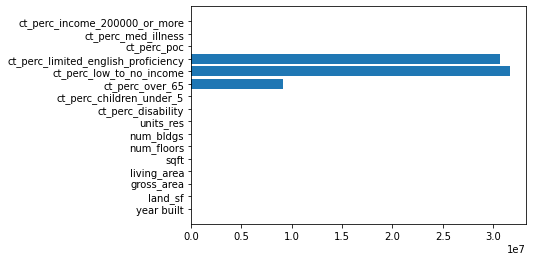

In [207]:
plt.barh(y=list(range(1,16+1)),width=abs(model1.coef_[0]).tolist(),tick_label=setup_1.drop(columns=['Severity','Index_Sum','Frequency_of_Complaints']).columns)
plt.show()
# setup_1.drop(columns=['Severity','Index_Sum','Frequency_of_Complaints']).columns

In [157]:
model1.score(X,y)

0.007076664069837424

In [158]:
y = setup_1['Index_Sum'].to_numpy().reshape(-1, 1)

In [159]:
scaler_y = StandardScaler().fit(y)
y = scaler_y.transform(y)

In [160]:
model2 = LinearRegression().fit(X,y)

In [161]:
model2.coef_

array([[ 1.19500857e-02,  1.87971280e-02,  2.05427739e-01,
        -5.58432772e-01,  2.53116880e-01,  2.07833938e-01,
         4.01103875e+00,  9.42874148e-02, -3.95277448e-02,
        -9.36652935e-02,  3.03798050e+07,  1.05607922e+08,
        -1.02407173e+08,  1.72469647e-02,  2.30124402e-02,
        -2.89201974e-02]])

In [162]:
model2.score(X,y)

0.07019662313862074

In [163]:
y = setup_1['Frequency_of_Complaints'].to_numpy().reshape(-1, 1)

In [164]:
scaler_y = StandardScaler().fit(y)
y = scaler_y.transform(y)

In [165]:
model1 = LinearRegression().fit(X,y)

In [166]:
model1.coef_

array([[ 2.31593535e-02,  1.44996319e-03, -1.21016519e-01,
         4.74364096e-01, -3.37749690e-01, -5.53444890e-02,
        -1.20276240e+00, -4.14474691e-03, -1.36234119e-02,
         4.87822962e-02, -9.10978164e+06, -3.16679159e+07,
         3.07081293e+07, -3.23054018e-02, -5.52868410e-05,
        -1.38910089e-02]])

In [167]:
model1.score(X,y)

0.006110334623749769

### Feature Encoding

In [215]:
X = setup_1.drop(columns=['Severity','Index_Sum','Frequency_of_Complaints']).to_numpy()

In [216]:
y = setup_1['Severity'].to_numpy().reshape(-1, 1)

In [217]:
scaler = StandardScaler().fit(X)
#reassign X_train/ X_test to be the tranformed version of itself
X = scaler.transform(X)

In [218]:
scaler_y = StandardScaler().fit(y)
y = scaler_y.transform(y)

In [219]:
y.shape

(15848, 1)

In [221]:
X.shape

(15848, 16)

In [222]:
feats = setup_1.drop(columns=['Severity','Index_Sum','Frequency_of_Complaints']).columns

In [229]:
feats

Index(['year built', 'land_sf', 'gross_area', 'living_area', 'sqft',
       'num_floors', 'num_bldgs', 'units_res', 'ct_perc_disability',
       'ct_perc_children_under_5', 'ct_perc_over_65',
       'ct_perc_low_to_no_income', 'ct_perc_limited_english_proficiency',
       'ct_perc_poc', 'ct_perc_med_illness', 'ct_perc_income_200000_or_more'],
      dtype='object')

<AxesSubplot:>

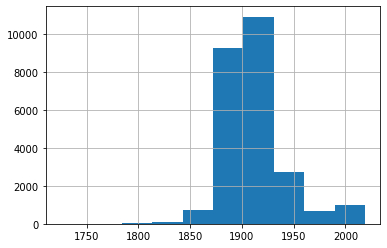

In [169]:
df_byaddress['year built'].hist()

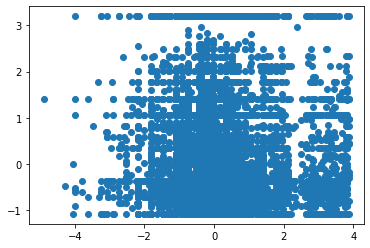

In [228]:
plt.scatter(X[:,0],y)
plt.show()

In [174]:
df_byaddress_v2 = df_byaddress.copy()

In [175]:
df_byaddress_v2['pre_1850'] = df_byaddress['year built'] < 1850.0

In [176]:
df_byaddress_v2['post_1850'] = df_byaddress['year built'] >= 1850.0

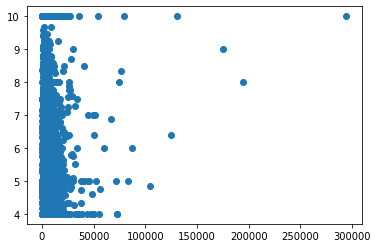

In [209]:
plt.scatter(df_byaddress['land_sf'],df_byaddress['Severity'])
plt.show()

<AxesSubplot:>

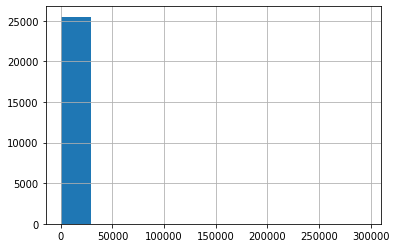

In [178]:
df_byaddress['land_sf'].hist()

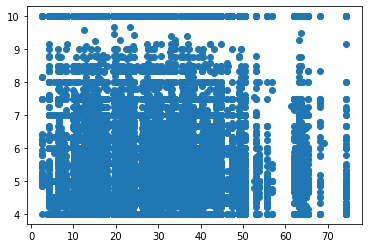

In [231]:
plt.scatter(df_byaddress['ct_perc_low_to_no_income'],df_byaddress['Severity'])
plt.show()

In [232]:
df_byaddress.head()

,year built,land_sf,gross_area,living_area,sqft,num_floors,num_bldgs,units_res,ct_perc_disability,ct_perc_children_under_5,ct_perc_over_65,ct_perc_low_to_no_income,ct_perc_limited_english_proficiency,ct_perc_poc,ct_perc_med_illness,ct_perc_income_200000_or_more,Severity,Index_Sum,Frequency_of_Complaints
address,,,,,,,,,,,,,,,,,,,
"1 Abbotsford St, 02121",1900.0,3577.0,5528.0,3109.0,3109.0,2.0,1.0,2.0,20.738363,22.600321,10.016051,35.345104,45.361156,97.817014,37.262921,1.061571,5.0,10,0.024213
"1 Acorn St, 02108",1829.0,822.0,2939.0,2300.0,2300.0,4.0,1.0,2.0,4.102075,14.190317,12.902456,6.677796,19.580253,9.802051,42.477701,26.284658,8.0,40,0.061538
"1 Adams St, 02129",1857.0,1056.0,4093.0,3843.0,3843.0,4.0,1.0,1.0,6.503690,14.852399,13.376384,9.870849,23.247232,5.350554,42.309963,25.625000,5.0,5,NaN
"1 Akron Pl, 02119",1890.0,1654.0,1911.0,1200.0,1200.0,2.0,1.0,1.0,18.717277,32.722513,10.994764,40.628272,51.623037,98.062827,36.766230,2.694236,5.0,5,NaN
"1 Aldie St, 02134",1890.0,4014.0,4060.0,2623.0,2623.0,2.5,1.0,2.0,7.853982,5.764503,2.704031,41.556047,44.260079,47.246804,36.923550,3.987847,5.0,35,0.025253


In [233]:
df_byaddress.columns

Index(['year built', 'land_sf', 'gross_area', 'living_area', 'sqft',
       'num_floors', 'num_bldgs', 'units_res', 'ct_perc_disability',
       'ct_perc_children_under_5', 'ct_perc_over_65',
       'ct_perc_low_to_no_income', 'ct_perc_limited_english_proficiency',
       'ct_perc_poc', 'ct_perc_med_illness', 'ct_perc_income_200000_or_more',
       'Severity', 'Index_Sum', 'Frequency_of_Complaints'],
      dtype='object')

In [235]:
df_byaddress.to_csv('byaddress_16feats_3targets_v1.csv')

<AxesSubplot:>

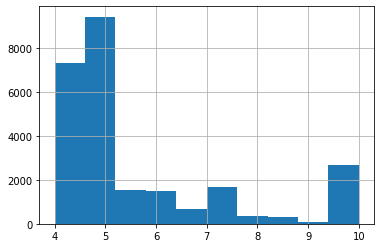

In [236]:
df_byaddress.Severity.hist()